In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/renatomaaliw3/public_files/refs/heads/master/Data%20Sets/personnel_data.csv' )
df.tail(3)

,EmployeeID,Age,Experience,EducationLevel,Salary,JobSatisfaction,Department,ProjectsHandled,PromotionLast5Years
497,498,34,2,2,33.01,5,3,5,0
498,499,30,23,2,52.72,7,5,20,0
499,500,48,22,1,36.94,4,2,15,0


In [ ]:
#Experience and Salary as selected features to cluster

reduced_df = df.iloc[:, [2, 4]]
reduced_df.head(3)

,Experience,Salary
0,1,33.07
1,4,19.37
2,28,52.64


Visualize the Data

<Axes: xlabel='Experience', ylabel='Salary'>

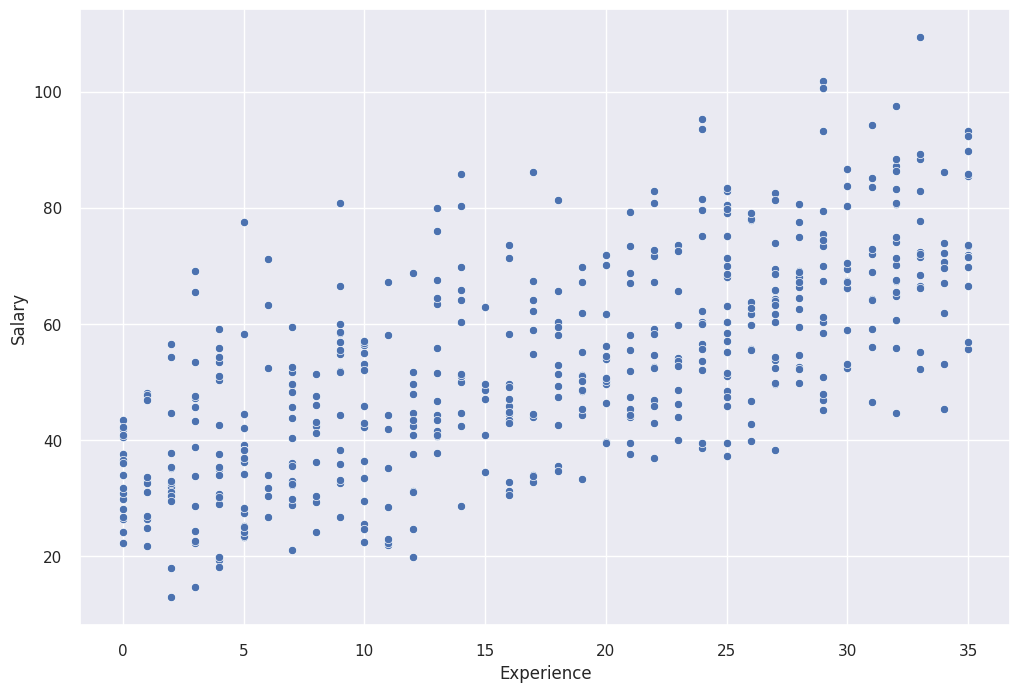

In [ ]:
sns.set(rc = {'figure.figsize': (12, 8)})

sns.scatterplot(x = reduced_df.iloc[:,0], y = reduced_df.iloc[:,1])

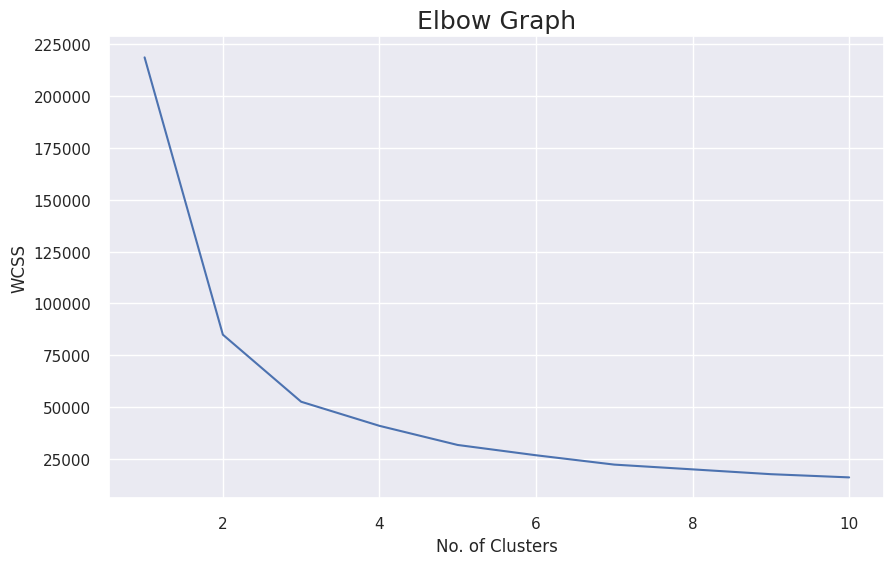

In [ ]:
from sklearn.cluster import KMeans

wcss = [] #empty list

for i in range(1, 11):

  model = KMeans(n_clusters = i, random_state = 0, n_init = 'auto')
  model.fit(reduced_df)
  wcss.append(model.inertia_)

plt.figure(figsize = (10,6))
plt.plot(range(1, 11), wcss)
plt.title('Elbow Graph', fontsize = 18)
plt.xlabel('No. of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

<ipython-input-173-c9c506599fe5>:7: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  sns.scatterplot(data = reduced_df, x = reduced_df.iloc[:,0], y = reduced_df.iloc[:,1],


<Axes: title={'center': 'Customer Clusters'}, xlabel='Experience', ylabel='Salary'>

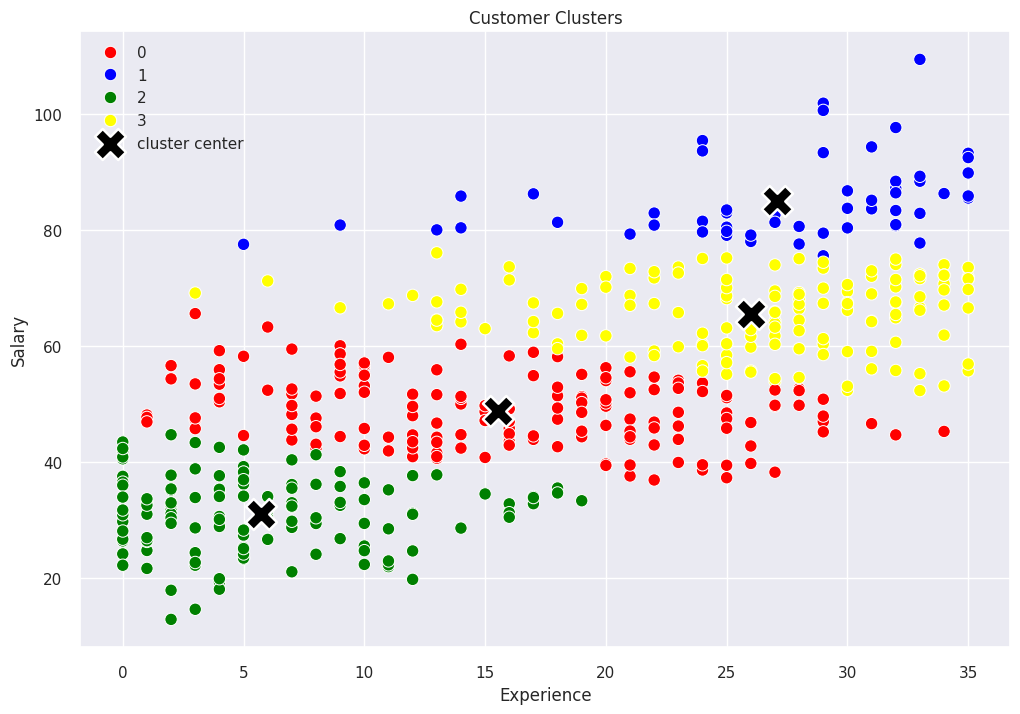

In [ ]:
model = KMeans(n_clusters = 4, random_state =101, n_init = 'auto')
clusters = model.fit_predict(reduced_df)

centroid = model.cluster_centers_
centroid_df = pd.DataFrame(centroid, columns = reduced_df.columns) # Needs to be a DataFrame according to new version update

sns.scatterplot(data = reduced_df, x = reduced_df.iloc[:,0], y = reduced_df.iloc[:,1],
                hue = clusters, palette = ['red','blue','green','yellow','brown'], s = 80).set(title = 'Customer Clusters')

sns.scatterplot(data = centroid_df, x = centroid_df['Experience'], y = centroid_df['Salary'],
                s = 500, marker = 'X', color = 'black', label = 'cluster center')


## Silhouette Score

<ipython-input-174-20fc9173013d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reduced_df['Cluster Descriptive'] = clusters
<ipython-input-174-20fc9173013d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reduced_df['Cluster Descriptive'].replace([0,1,2,3],['Senior Professionale', 'Fast-Tracked Professional',
<ipython-input-174-20fc9173013d>:5: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  sns.scatterplot(data = reduced_df, x = reduced_df.iloc[:,0], y = reduced_df.iloc[:,1],


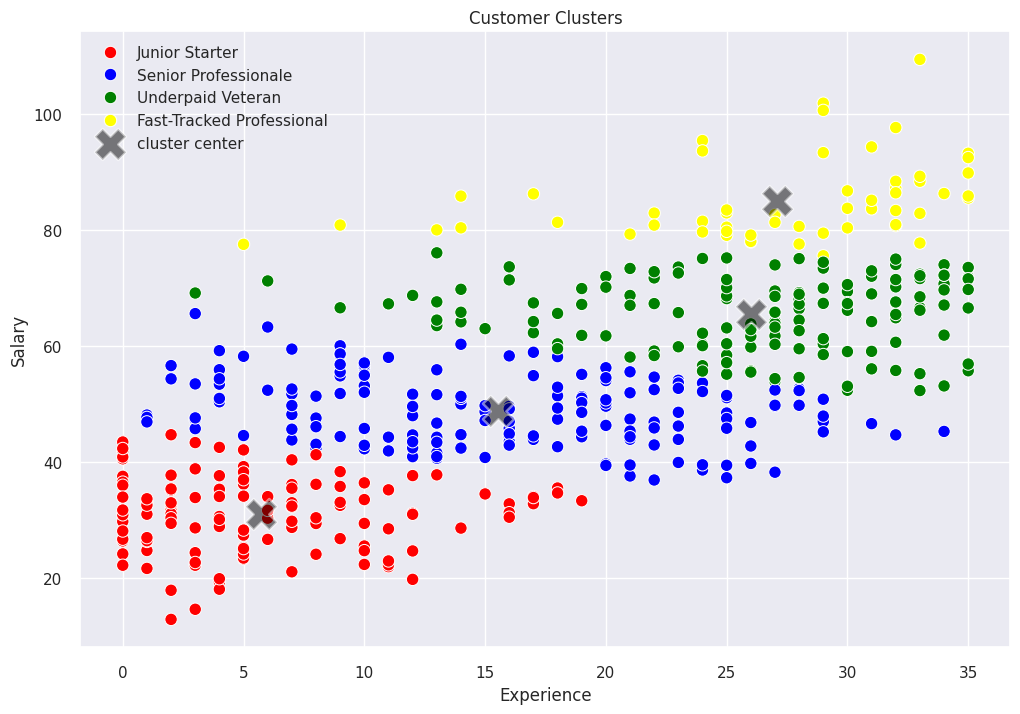

In [ ]:
reduced_df['Cluster Descriptive'] = clusters
reduced_df['Cluster Descriptive'].replace([0,1,2,3],['Senior Professionale', 'Fast-Tracked Professional',
                                                       'Junior Starter', 'Underpaid Veteran'], inplace = True)

sns.scatterplot(data = reduced_df, x = reduced_df.iloc[:,0], y = reduced_df.iloc[:,1],
                hue = reduced_df['Cluster Descriptive'], palette = ['red','blue','green','yellow','brown'], s = 80).set(title = 'Customer Clusters')

sns.scatterplot(data = centroid_df, x = centroid_df['Experience'], y = centroid_df['Salary'],
                s = 500, marker = 'X', color = 'black', label = 'cluster center', alpha = 0.5)

plt.show()

In [ ]:
centroids = model.cluster_centers_

# Print the centroids
print("Centroids of each cluster:")
print(centroids)

Centroids of each cluster:
[[15.5497076  48.9005848 ]
 [27.09090909 85.02836364]
 [ 5.71317829 31.13511628]
 [26.         65.55110345]]


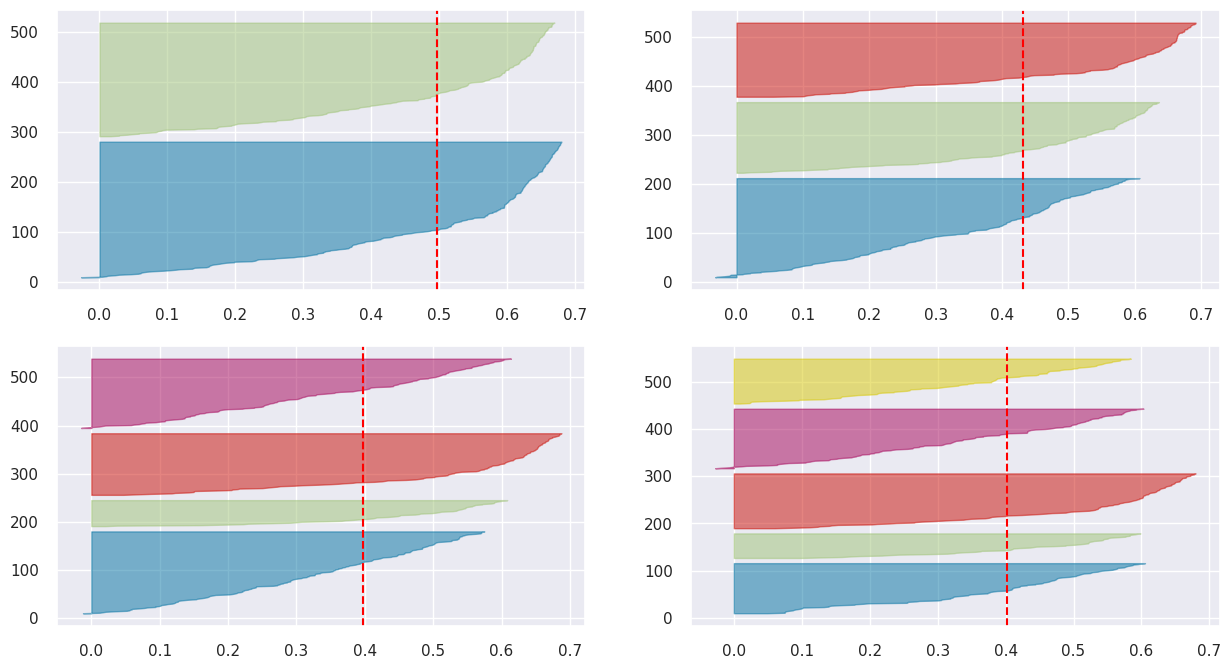

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(2,2, figsize = (15,8))

for i in [2, 3, 4, 5]:

  # Create KMeans instance for different number of clusters

  km = KMeans(n_clusters = i, random_state = 101, n_init = 'auto')
  q, mod = divmod(i, 2)

  # Create SilhouetteVisualizer

  visualizer = SilhouetteVisualizer(km, colors = 'yellowbrick', ax = ax[q - 1][mod])
  visualizer.fit(reduced_df.drop('Cluster Descriptive', axis = 1))

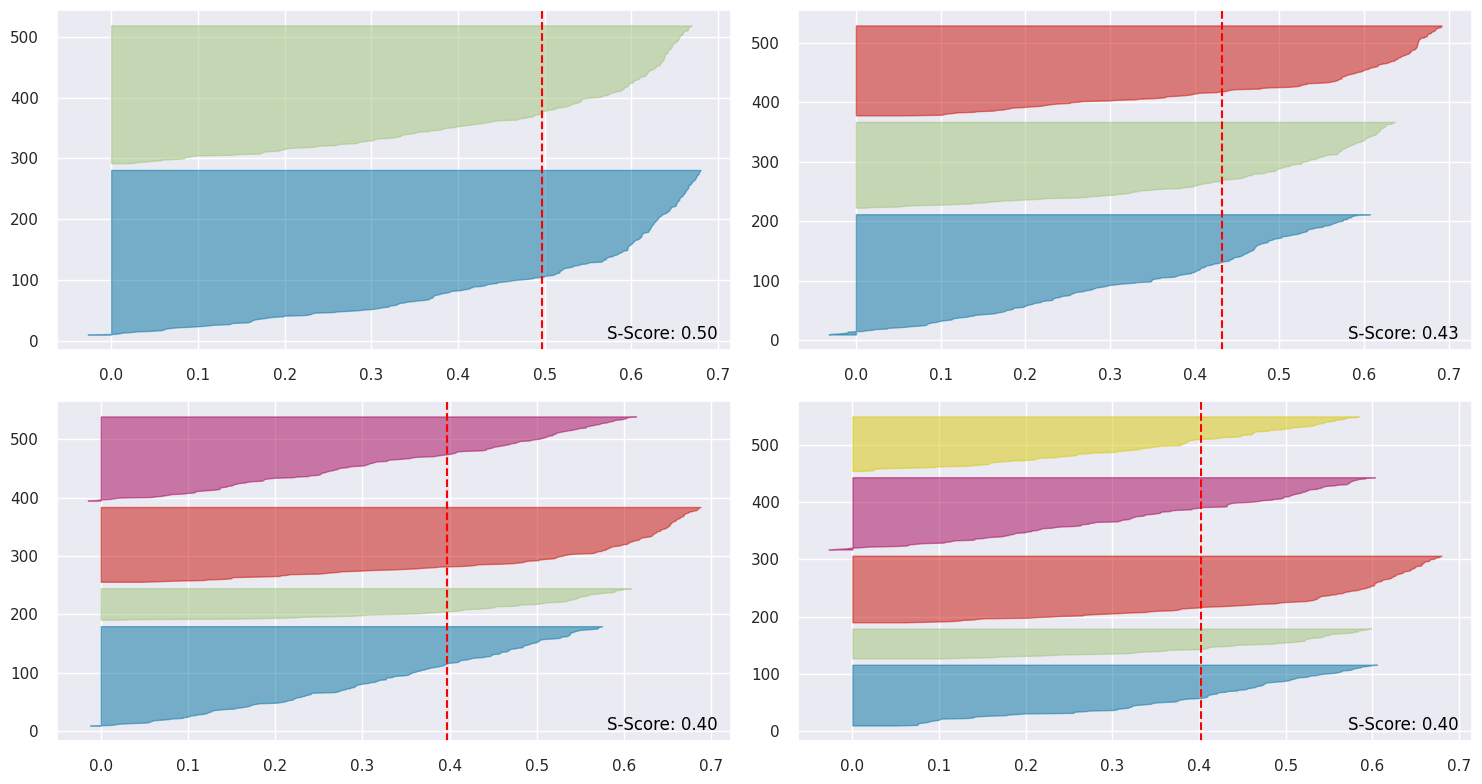

In [ ]:
# With Scores on the Graph

fig, ax = plt.subplots(2, 2, figsize=(15, 8))

for i in [2, 3, 4, 5]:

    # Create KMeans instance for different number of clusters

    km = KMeans(n_clusters=i, random_state=101, n_init='auto')
    q, mod = divmod(i, 2)

    # Create SilhouetteVisualizer
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q - 1][mod])
    visualizer.fit(reduced_df.drop('Cluster Descriptive', axis=1))

    # Annotate the silhouette score on the plot
    silhouette_score = visualizer.silhouette_score_
    ax[q - 1][mod].text(0.98, 0.02, f'S-Score: {silhouette_score:.2f}',
                        transform = ax[q - 1][mod].transAxes,
                        ha='right', va='bottom', fontsize=12, color='black')

plt.tight_layout()
plt.show()

In [ ]:
df1 = pd.read_csv('https://raw.githubusercontent.com/renatomaaliw3/public_files/refs/heads/master/Data%20Sets/personnel_data.csv' )
df1.tail(3)

,EmployeeID,Age,Experience,EducationLevel,Salary,JobSatisfaction,Department,ProjectsHandled,PromotionLast5Years
497,498,34,2,2,33.01,5,3,5,0
498,499,30,23,2,52.72,7,5,20,0
499,500,48,22,1,36.94,4,2,15,0


In [ ]:
#Age and Salary
reduced_df1 = df.iloc[:, [1, 4]]
reduced_df1.head(3)

,Age,Salary
0,50,33.07
1,36,19.37
2,29,52.64


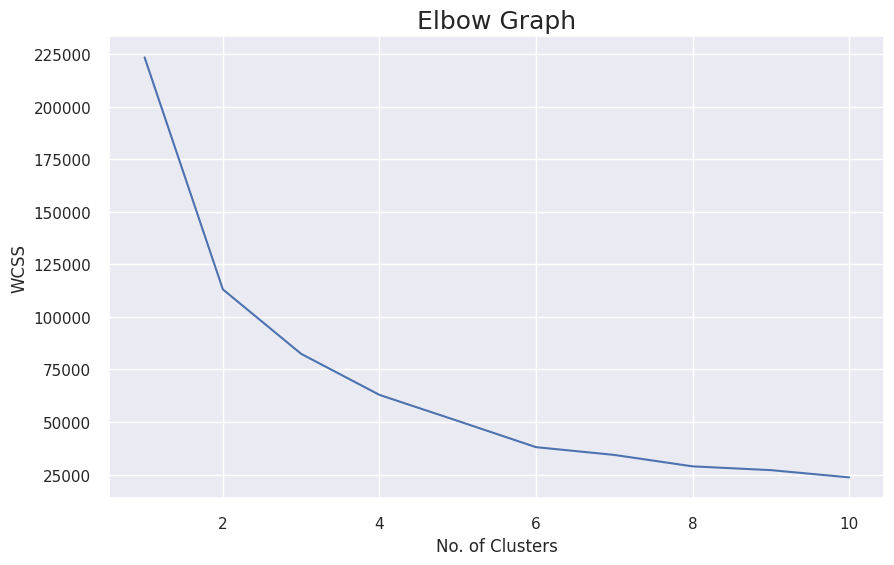

In [ ]:
from sklearn.cluster import KMeans

wcss = [] #empty list

for i in range(1, 11):

  model = KMeans(n_clusters = i, random_state = 0, n_init = 'auto')
  model.fit(reduced_df1)
  wcss.append(model.inertia_)

plt.figure(figsize = (10,6))
plt.plot(range(1, 11), wcss)
plt.title('Elbow Graph', fontsize = 18)
plt.xlabel('No. of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

<Axes: title={'center': 'Personnel Clusters'}, xlabel='Age', ylabel='Salary'>

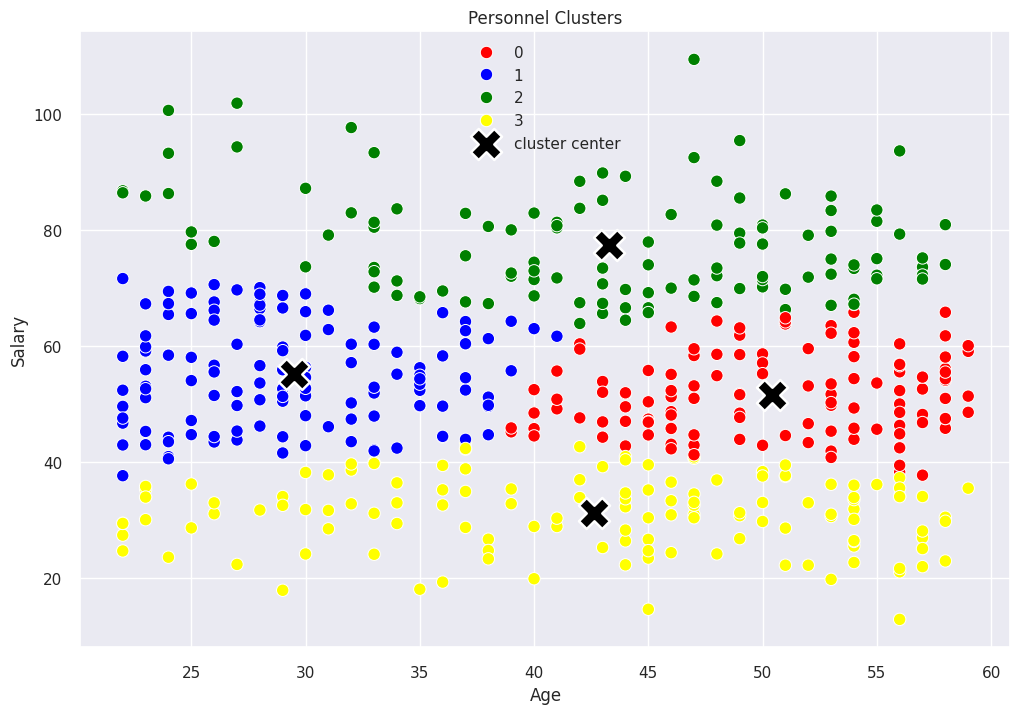

In [ ]:
model = KMeans(n_clusters = 4, random_state =101, n_init = 'auto')
clusters = model.fit_predict(reduced_df1)

centroid = model.cluster_centers_
centroid_df = pd.DataFrame(centroid, columns = reduced_df1.columns) # Needs to be a DataFrame according to new version update

sns.scatterplot(data = reduced_df1, x = reduced_df1.iloc[:,0], y = reduced_df1.iloc[:,1],
                hue = clusters, palette = ['red','blue','green','yellow'], s = 80).set(title = 'Personnel Clusters')

sns.scatterplot(data = centroid_df, x = centroid_df['Age'], y = centroid_df['Salary'],
                s = 500, marker = 'X', color = 'black', label = 'cluster center')

<ipython-input-182-3c95567861b6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reduced_df1['Cluster Descriptive'] = clusters
<ipython-input-182-3c95567861b6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reduced_df1['Cluster Descriptive'].replace([0,1,2,3],['Senior & High Income', 'Young & High Income',


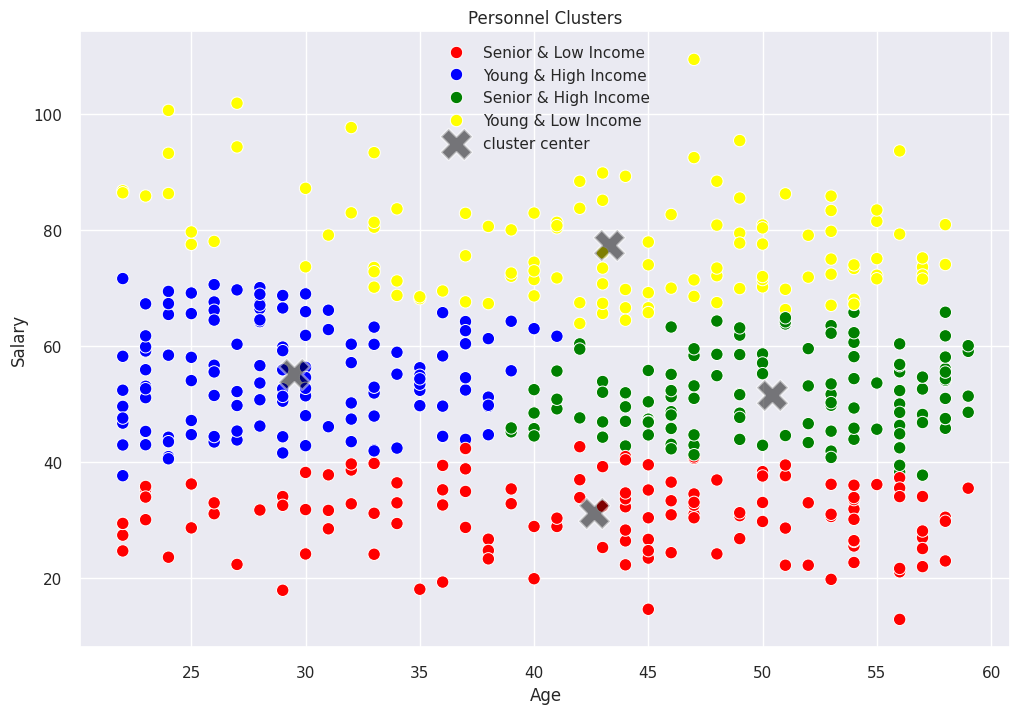

In [ ]:
reduced_df1['Cluster Descriptive'] = clusters
reduced_df1['Cluster Descriptive'].replace([0,1,2,3],['Senior & High Income', 'Young & High Income',
                                                       'Young & Low Income', 'Senior & Low Income'], inplace = True)

sns.scatterplot(data = reduced_df1, x = reduced_df1.iloc[:,0], y = reduced_df.iloc[:,1],
                hue = reduced_df1['Cluster Descriptive'], palette = ['red','blue','green','yellow'], s = 80).set(title = 'Personnel Clusters')

sns.scatterplot(data = centroid_df, x = centroid_df['Age'], y = centroid_df['Salary'],
                s = 500, marker = 'X', color = 'black', label = 'cluster center', alpha = 0.5)

plt.show()

In [ ]:
centroids = model.cluster_centers_

# Print the centroids
print("Centroids of each cluster:")
print(centroids)

Centroids of each cluster:
[[50.42622951 51.59295082]
 [29.5078125  55.1390625 ]
 [43.2991453  77.35521368]
 [42.60150376 31.25714286]]


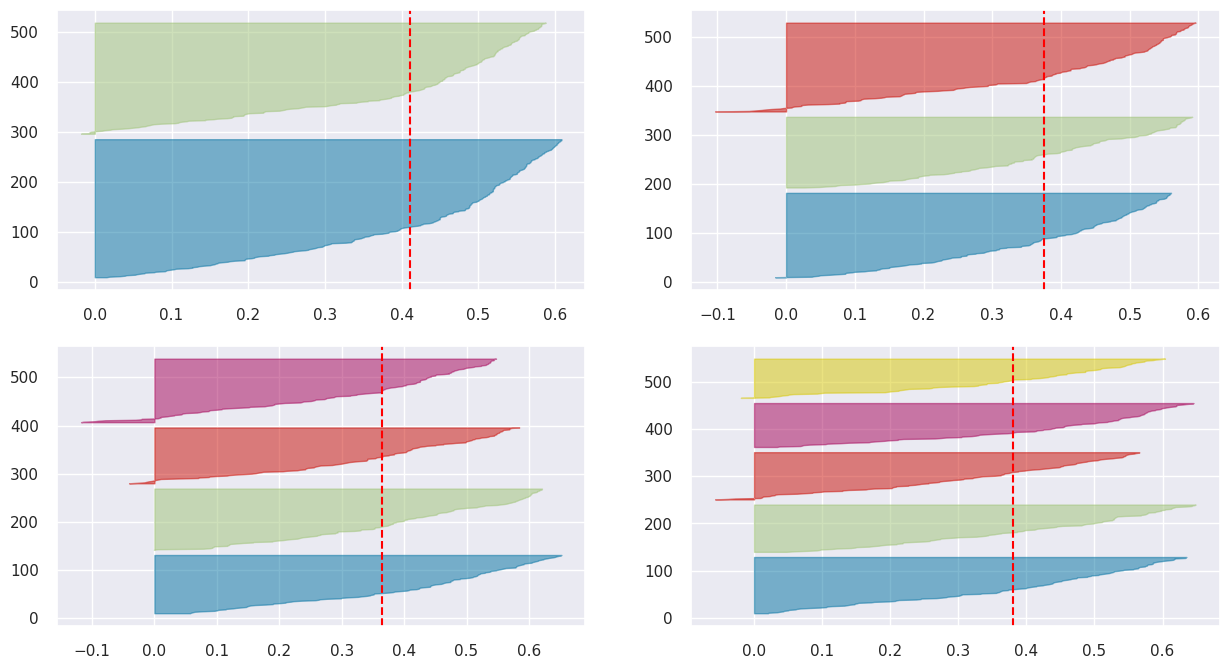

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(2,2, figsize = (15,8))

for i in [2, 3, 4, 5]:

  # Create KMeans instance for different number of clusters

  km = KMeans(n_clusters = i, random_state = 101, n_init = 'auto')
  q, mod = divmod(i, 2)

  # Create SilhouetteVisualizer

  visualizer = SilhouetteVisualizer(km, colors = 'yellowbrick', ax = ax[q - 1][mod])
  visualizer.fit(reduced_df1.drop('Cluster Descriptive', axis = 1))

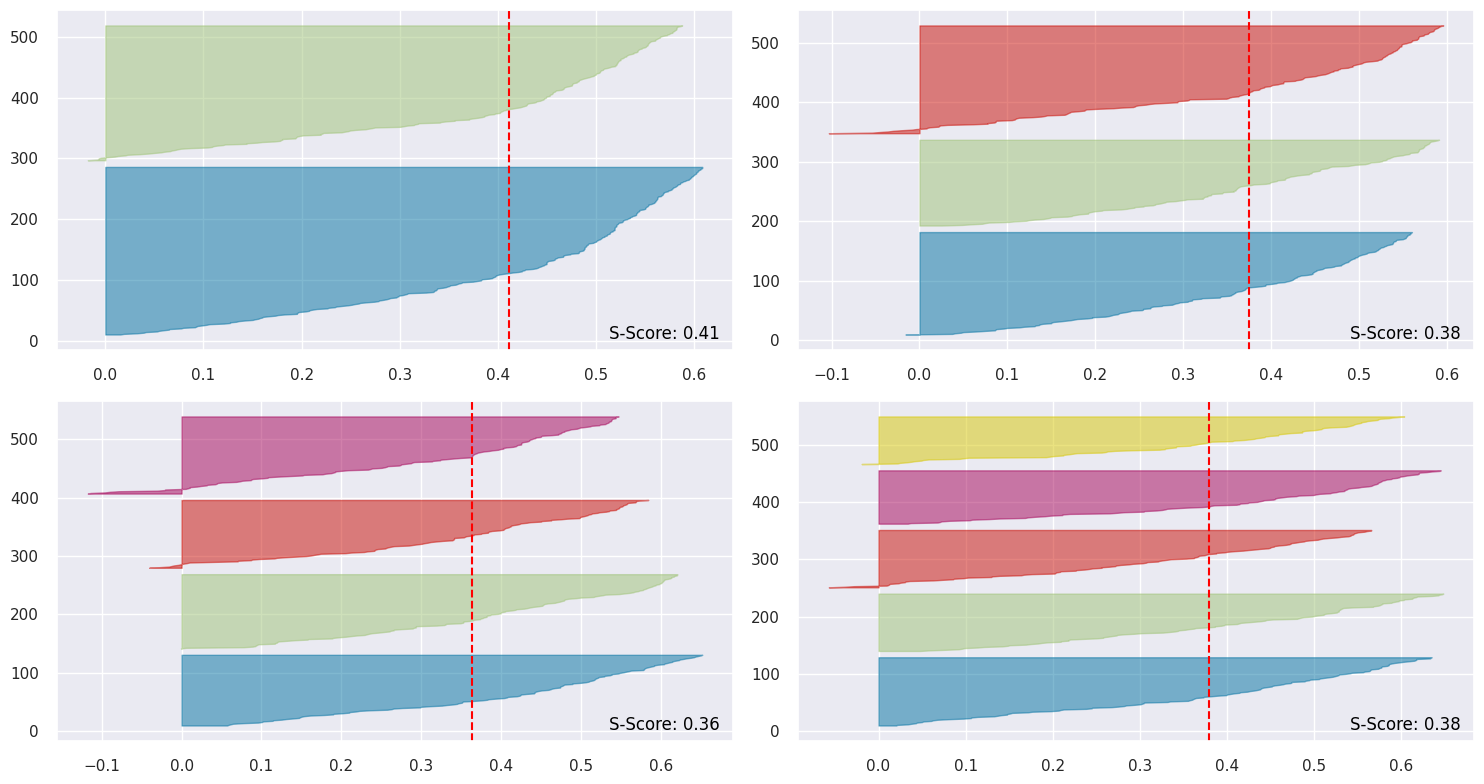

In [ ]:
# With Scores on the Graph

fig, ax = plt.subplots(2, 2, figsize=(15, 8))

for i in [2, 3, 4, 5]:

    # Create KMeans instance for different number of clusters

    km = KMeans(n_clusters=i, random_state=101, n_init='auto')
    q, mod = divmod(i, 2)

    # Create SilhouetteVisualizer
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q - 1][mod])
    visualizer.fit(reduced_df1.drop('Cluster Descriptive', axis=1))

    # Annotate the silhouette score on the plot
    silhouette_score = visualizer.silhouette_score_
    ax[q - 1][mod].text(0.98, 0.02, f'S-Score: {silhouette_score:.2f}',
                        transform = ax[q - 1][mod].transAxes,
                        ha='right', va='bottom', fontsize=12, color='black')

plt.tight_layout()
plt.show()